In this notebook, we continue to look at linear regression problem
$$
\mathrm{arg}\min_{\theta}J(\theta) = \frac{1}{2}\sum_{i=1}^m \left(h(x^{(i)}, \theta)- y^{(i)}\right)^2
$$
where 
$$
h(x,\theta) = \theta_0 + \theta_1x_1+\ldots+\theta_Dx_D
$$

## The normal equations
We define the **design matrix** $\textbf{X}$ to be $m\times (D+1)$ matrix that contains training input values in its rows i.e
$$
\textbf{X} = \left(\begin{array}{cc}
1 & \left(x^{(1)}\right)^T\\
\vdots\\
1 & \left(x^{(m)}\right)^T\\
\end{array}\right)
$$
Also $\textbf{y}$ be the $m$-dimensional vector that contains training target values.
$$
\textbf{y} = \left(\begin{array}{c}
 y^{(1)}\\
\vdots\\
y^{(m)}\\
\end{array}\right)
$$

Then the **least-square** loss function can be re-written as follows
$$
J(\theta) = \frac{1}{2}\left(\textbf{y} - \textbf{X}\theta\right)^T\left(\textbf{y} - \textbf{X}\theta\right)
$$
We have
$$
\begin{split}
\nabla_{\theta}J(\theta) &= \frac{1}{2} \left(\theta^T\textbf{X}^T\textbf{X}\theta - 2 y^T\textbf{X}\theta + y^Ty\right)\\
&= \frac{1}{2} \left(\textbf{X}^T\textbf{X}\theta + \textbf{X}^T\textbf{X}\theta - 2\textbf{X}^Ty\right)\\
&= \textbf{X}^T\textbf{X}\theta - \textbf{X}^Ty
\end{split}
$$
where we use the two following derivations

\begin{split}
\nabla_{\theta}\left(\theta^TA\theta\right) &= (A+A^T)\theta\\
\nabla_{\theta}\left(A\theta\right) &= A^T
\end{split}


To minimize $J(\theta)$, we could set its derivatives to zero $\nabla_{\theta}J(\theta) = 0$ which implies **the normal equations**
$$
\textbf{X}^T\textbf{X}\theta - \textbf{X}^Ty = 0
$$
Thus, the $\theta$ that minimizes $J(\theta)$ is given in closed form by the equation
$$
\theta = \left(\textbf{X}^T\textbf{X}\right)^{-1}\textbf{X}^Ty
$$

### Parameters' statistics
Recall the assumption that we have 
$$
y^{(i)} = h(x^{(i)},\theta^*) + \epsilon^{(i)}
$$
where $\theta^*$ is the real model's $\theta$. This can re-written in matrix form
$$
\textbf{y} = \textbf{X}\theta^* + \epsilon
$$
Plug this into the closed form of fitted $\theta$ (denoted by $\theta^f$)
$$
\theta^f = \left(\textbf{X}^T\textbf{X}\right)^{-1}\textbf{X}^T(\textbf{X}\theta^* + \epsilon) = \theta^* + \left(\textbf{X}^T\textbf{X}\right)^{-1} \textbf{X}^T\epsilon
$$
so the $\theta^f$ is an un-biased estimation of $\theta^*$ i.e
$$
\mathbb{E}\left[\theta^f\right] = \theta^*
$$
and the variance of $\theta^f$ is given by the equation
\begin{split}
\mathbb{V}\left[\theta^f\right] &= \mathbb{E}\left[\left(\textbf{X}^T\textbf{X}\right)^{-1}\textbf{X}^T \epsilon \epsilon^T \textbf{X}\left(\textbf{X}^T\textbf{X}\right)^{-1}\right] \\
&= \sigma^2 \left(\textbf{X}^T\textbf{X}\right)^{-1}\textbf{X}^T \textbf{X}\left(\textbf{X}^T\textbf{X}\right)^{-1}\\
&= \sigma^2 \left(\textbf{X}^T\textbf{X}\right)^{-1}
\end{split}
since we have $\mathbb{E}\left[\epsilon \epsilon^T\right] = \sigma^2 \mathrm{Id}_{m}$ (where $\mathrm{Id}_{m}$ is the identity matrix of size $m\times m$). Thus we have
$$
\theta^f \sim \mathcal{N}\left(\theta^*, \sigma^2 \left(\textbf{X}^T\textbf{X}\right)^{-1}\right)
$$
Typically, one estimates the variance $\sigma^2$ by
$$
\hat{\sigma}^2= \frac{1}{m-D-1} \sum_{i=1}^m \left(h(x^{(i)},\theta^f) - y^{(i)}\right)^2
$$
This allows us to 
* test if a particular coefficient $\theta_j=0$ using *Z-score*
$$
z_j = \frac{\theta^f_j}{\hat{\sigma}\sqrt{v_j}}
$$
where $v_j$ is the $j-th$ diagonal element of $\left(\textbf{X}^T\textbf{X}\right)^{-1}$. Under the null hypothesis that $\theta_j=0$, $z_j$ is distributed as $t_{N-D-1}$ ($t$ student distribution with $N-p-1$ degrees of freedom), and hence a large (absolute) value of $z_j$ will leed to rejection of this null hypothesis.
* estimate $1-2\alpha$ confidence interval of coefficient:
$$
\theta^*_j \in (\theta^f_j - \mathcal{N}^{-1}(1-\alpha)\hat{\sigma}\sqrt{v_j}, \theta^f_j + \mathcal{N}^{-1}(1-\alpha)\hat{\sigma}\sqrt{v_j})
$$
where $\alpha=0.025$ gives 95% confidence interval:
$$
\theta^*_j \in (\theta^f_j - 1.96\hat{\sigma}\sqrt{v_j}, \theta^f_j + 1.96\hat{\sigma}\sqrt{v_j})
$$

Let's implement linear regression using the normal equations. We start by loading needed modules

In [2]:
import numpy as np
import sys

# add parent to search path
if '..' not in sys.path:
    sys.path.insert(0, '..')

    
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

# imported helpers function   
from helpers import linear_regression, vis

# create a synthetic dataset
in_theta = np.array([2.0, 3.5])
sigma = .2
min_x = [0.]
max_x = [1.]
N = 100
data_X, data_y = linear_regression.create_dataset(in_theta, min_x, max_x, sigma, N)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The implementation is straightforward and you can look at `linear_regression.py` for more detail. We now try it with synthetic dataset

In [3]:
print('original theta {}\n'.format(in_theta))
clf = linear_regression.LinearRegressionModel()
clf.fit(data_X, data_y)

clf.summary()

original theta [ 2.   3.5]

R2-score 0.962

Fitted parameters
coef       fitted    F-score    low 95%    high 95%
-------  --------  ---------  ---------  ----------
theta_0   1.9916     53.1477    1.91815     2.06505
theta_1   3.56031    50.0866    3.42099     3.69964


Looking at above result we see
* F-score is high: so we can reject null hypothesis
* $\theta^f$ is closed to original $\theta^*$
* confidence interval contains the true $\theta^*$ as expected

### Pros and cons
Using the normal equations has quite a few advantage
* it's fast and accurate
* it returns useful statitics
* it can handle huge data: we can notice that the only thing we need is $X^TX$ and $X^Ty$, this can be computed iteratively for huge data as long as number of features input is not big.

However, it also has some weekness
* solving the normal equations can be un-stable when data is skewed (big feature values and small features values), one can scale input features to same range before using the fit

## Bayesian view and maximum-a-posteriori (MAP)
From beginning until now, we approach the linear regression problem using maximum-likelihood, this approach assumes $\theta$ is a fixed parameters. An alternative way to approach our parameter estimation problems is to
take the **Bayesian** view of the world where $\theta$ is a random variable whose value is unknown. In this approach, we would specify a prior distribution $p(\theta)$ on $\theta$ that expresses our “prior beliefs” about the
parameters. 

Given a training set $S = \left\{(x^{(i)}, y^{(i)})\right\}_{i=1}^m$, we can compute the posteriori
$$
p(\theta|S) = \frac{p(S|\theta)p(\theta)}{p(S)}
$$
The **maximum-a-posteriori (MAP)** approach assumes 
* $p(S)$ does not depend on any particular $\theta$
* $p(S|\theta) = \prod_{i=1}^m p((x^{(i)}, y^{(i)})|\theta)$

Then **MAP** estimates $\theta$ such that
$$
\theta = \mathrm{arg}\max_{\theta} \left(\prod_{i=1}^m p\left((x^{(i)}, y^{(i)})|\theta\right) \right) p(\theta)
$$

### MAP as Ridge regression
For linear regression, let's consider a special case:
* prior distribution $\theta \sim \mathcal{N}(0, \tau^2\mathrm{Id}_{D+1})$
* and $y^{(i)}  = h(x^{(i)}, \theta) + \epsilon^{(i)}$ where $\epsilon^{(i)}$ are i.i.d $\sim \mathcal{N}(0,\sigma^2)$

Then by taking $-\log$ on $\left(\prod_{i=1}^m p\left((x^{(i)}, y^{(i)})|\theta\right) \right) p(\theta)$ we obtain
$$\begin{split}
\theta &= \mathrm{arg}\min_{\theta} \sum_{i=1}^m -\log p\left((x^{(i)}, y^{(i)})|\theta\right) - \log p(\theta)\\
&= \mathrm{arg}\min_{\theta}\sum_{i=1}^m\left(cst + \frac{\left(y^{(i)}- h(x^{(i)},\theta)\right)^2}{2\sigma^2}\right) + \sum_{j=0}^{D}\left(cst + \frac{\theta_j^2}{2\tau^2}\right)\\
&= \mathrm{arg}\min_{\theta} \sum_{i=1}^m \frac{\left(y^{(i)}- h(x^{(i)},\theta)\right)^2}{2\sigma^2} + \sum_{j=0}^{D}\frac{\theta_j^2}{2\tau^2}\\
&= \mathrm{arg}\min_{\theta} \sum_{i=1}^m \left(y^{(i)}- h(x^{(i)},\theta)\right)^2 + \frac{\sigma^2}{\tau^2} \sum_{j=0}^{D}\theta_j^2
\end{split}
$$
Denote $r=\frac{\sigma^2}{\tau^2}$, the **MAP** estimators becomes
$$
\mathrm{arg}\min_{\theta} \sum_{i=1}^m \left(y^{(i)}- h(x^{(i)},\theta)\right)^2 + r\times \sum_{j=0}^{D}\theta_j^2
$$
The above form is also called **Ridge** regression which is a form of parameter regularisation. Intuitively if $\tau$ is small i.e "prior beliefs" believes that $\theta$ is closed to zeros, then we will have $r$ is big which pernalizes large value of $\theta$.

The **MAP** estimators can be written in matrix form
$$
\mathrm{arg}\min_{\theta} \left(\textbf{y}-\textbf{X}\theta \right)^T\left(\textbf{y} -\textbf{X}\theta\right) + r\times \theta^T\theta
$$
By taking derivatives as previous step, we also obtain closed form given by
$$
\theta^{\mathrm{MAP}} = \left(\textbf{X}^T\textbf{X} + r\times \mathrm{Id}_{D+1}\right)^{-1}\textbf{X}^Ty
$$

Note that, the regularization term often ignores the intercept $\theta_0$, this can easily done by first substract both $x^{(i)}, y^{(i)}$ by its empirical mean $\bar{x}, \bar{y}$ and do the optimization without the intercept to obtain $\theta_1,...,\theta_D$ then the intercept is given by equation
$$
\theta_0 = \bar{y} - \bar{x}^T\left(\begin{array}{c}\theta_1\\ \vdots\\ \theta_D\end{array}\right)
$$

First, we create and visualize a synthetic dataset

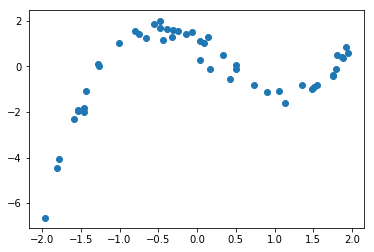

In [4]:
theta = np.array([1.0, -1.0, -2.0, 1.0])
min_x = -2.0
max_x = 2.0
sigma = 0.3
N = 50
poly_X, poly_y = linear_regression.create_poly_dataset(theta, min_x, max_x, sigma, N, deg = 6)

import matplotlib.pyplot as plt
%matplotlib inline

vis.draw(poly_X[:,1], poly_y)

Now let's fit our polynomial using Ridge regression with $r=0$ (i.e no regularization) with various degree

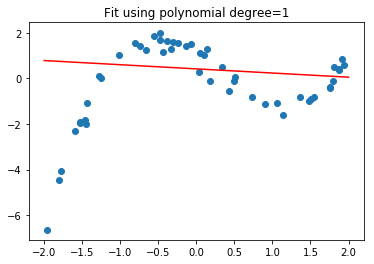

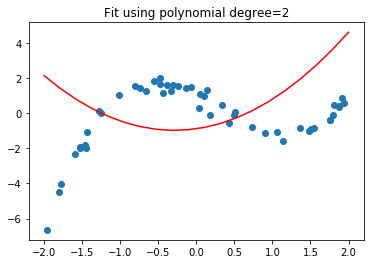

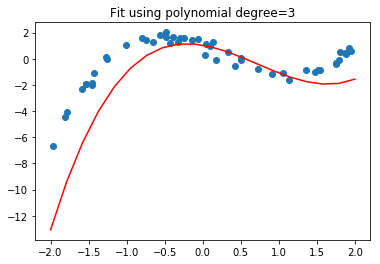

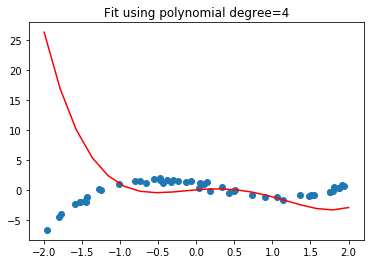

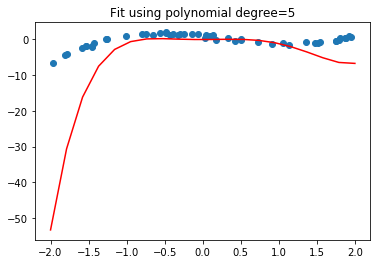

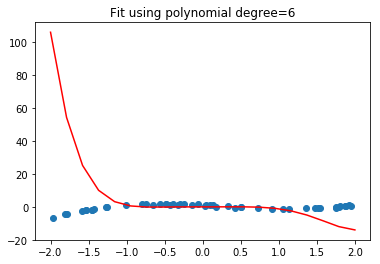

In [15]:
clf = linear_regression.RidgeRegressionModel(reg = 0.)
x = np.linspace(min_x, max_x, 20)

for deg in range(1,7):
    clf.fit(poly_X[:,:deg+1], poly_y)
    fig_ax = vis.draw(poly_X[:,1], poly_y, title='Fit using polynomial degree={}'.format(deg))
    vis.draw(x, clf.predict(x), fig_ax=fig_ax, plot_type='plot', colors='r')


Looking at above results we notice that
* for degree <=2: we are underfitting, the fitted curve has high-bias
* for degree =3: we are closest to the real curve
* for dgree > 3: we are high-variance, the curve fits well on central datas but behaves poorly for edge datas.

Now let's try it again with regulization $r=10.0$

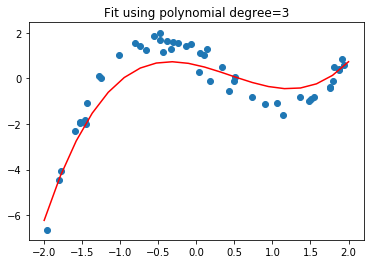

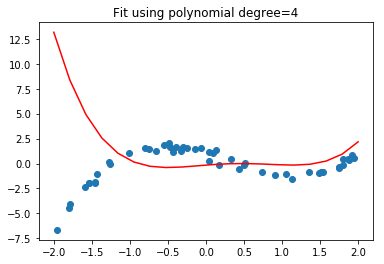

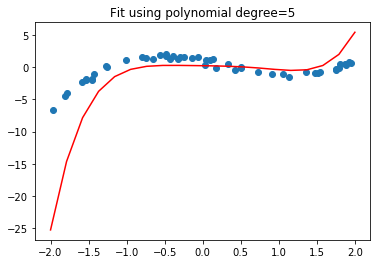

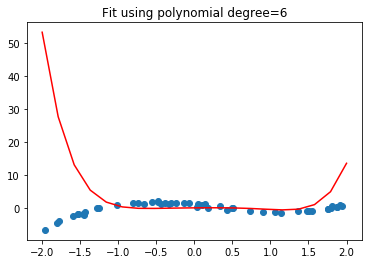

In [16]:
clf = linear_regression.RidgeRegressionModel(reg = 10)
x = np.linspace(min_x, max_x, 20)

for deg in range(3,7):
    clf.fit(poly_X[:,:deg+1], poly_y)
    fig_ax = vis.draw(poly_X[:,1], poly_y, title='Fit using polynomial degree={}'.format(deg))
    vis.draw(x, clf.predict(x), fig_ax=fig_ax, plot_type='plot', colors='r')


Using a regularization 10 seems improves the fit for polynomial degree 3 & 5. We can use higher level of $r$ but for $r>10$ it starts has affect on fitting performance. Normally, one can tune the regularization using a validation set.

## Conclusition
We have learnt the normal equations for linear regression with/without regularization. The normal equations is not only very effecient but also returns very useful statistics.